# Analysis of meteorological data of Nyíregyháza

The purpose of the analysis is to help the further research of those working in the field of tobacco. The source data were given from meteorological dataset of Hungaromet (https://odp.met.hu/climate/homogenized_data/station_data_series/). The dataset contains several cities' data, but in this analysis we only used data from Nyíregyháza. In the dataset there are daily temperature and precipitation data from 1901 to 2023. Temperature data have 3 types: minimum, mean and maximum temperatures. First we want to see if there has been any change in temperature data over the last 123 years?

In [28]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [4]:
#import the dataset into a dataframe
dfnyh = pd.read_csv('meteo_nyh.csv')
dfnyh.head()

,Date,mintemp,meantemp,maxtemp,precip
0,1901-01-01,-13.7,-10.9,-1.0,0.7
1,1901-01-02,-15.0,-10.8,-8.8,0.5
2,1901-01-03,-13.1,-11.7,-10.0,1.1
3,1901-01-04,-17.4,-14.5,-10.6,0.0
4,1901-01-05,-17.7,-12.9,-9.8,0.0


In [9]:
#check the data quantity (row*column)
dfnyh.size

224625

In [10]:
#convert Date column to datetime type
dfnyh['Date'] = pd.to_datetime(dfnyh['Date'])
dfnyh.dtypes

Date        datetime64[ns]
mintemp            float64
meantemp           float64
maxtemp            float64
precip             float64
dtype: object

In [11]:
#set column Date as index
dfnyh.set_index('Date', inplace=True)

In [12]:
#take the mean annual value of the mean daily temperatures (column meantemp)
annual_avg_meantemp = dfnyh['meantemp'].resample('YE').mean()

In [13]:
#remove the index from column Date
df_avgmeantemp = annual_avg_meantemp.reset_index()
df_avgmeantemp.columns = ['Date', 'Avg_meantemp']
df_avgmeantemp.head()

,Date,Avg_meantemp
0,1901-12-31,10.016438
1,1902-12-31,8.551781
2,1903-12-31,10.196986
3,1904-12-31,9.794262
4,1905-12-31,9.593425


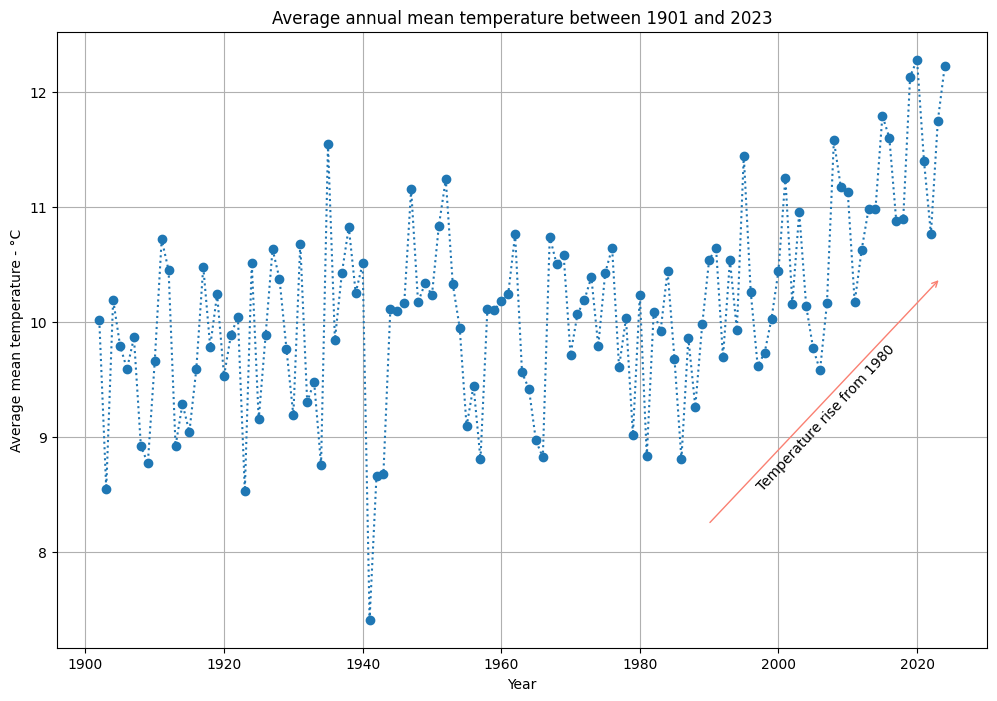

In [14]:
#plot the average annual mean temperature
plt.figure(figsize=(12,8))
plt.plot(df_avgmeantemp['Date'], df_avgmeantemp['Avg_meantemp'], marker='o', linestyle='dotted')
plt.xlabel('Year')
plt.ylabel('Average mean temperature - °C')
plt.title('Average annual mean temperature between 1901 and 2023')
plt.grid(True)
plt.annotate('Temperature rise from 1980', xy=(35, 8.5), rotation=47, ha='left', va='bottom', xytext=(0.75, 0.25), textcoords='axes fraction') 
plt.annotate('', xy=(0.95,0.6), xytext=(0.7,0.2), xycoords='axes fraction', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='salmon'))
plt.show()

As we can see, apart from few outliers, the average temperature is constant but from year 1980 there is an intense increase , so we examine the data starting from this year.

In [18]:
#take the mean and summarized annual value of all columns
annual_avg = dfnyh.resample('YE').mean()
annual_sum = dfnyh.resample('YE').sum()

In [19]:
#select the temperature columns from the average calculation
annual_avgtemp = annual_avg[['mintemp', 'meantemp', 'maxtemp']]

In [20]:
#select the years 1980-2023 from the average calculation
annual_avgtemp1980 = annual_avgtemp.iloc[79:,0:5]

In [21]:
#select the years 1980-2023 from the summarized calculation
annual_sum1980 = annual_sum.iloc[79:,0:5]

In [22]:
#select the precipitation column from the summarized calculation
annual_sum1980prec = annual_sum1980.iloc[:,3:5]

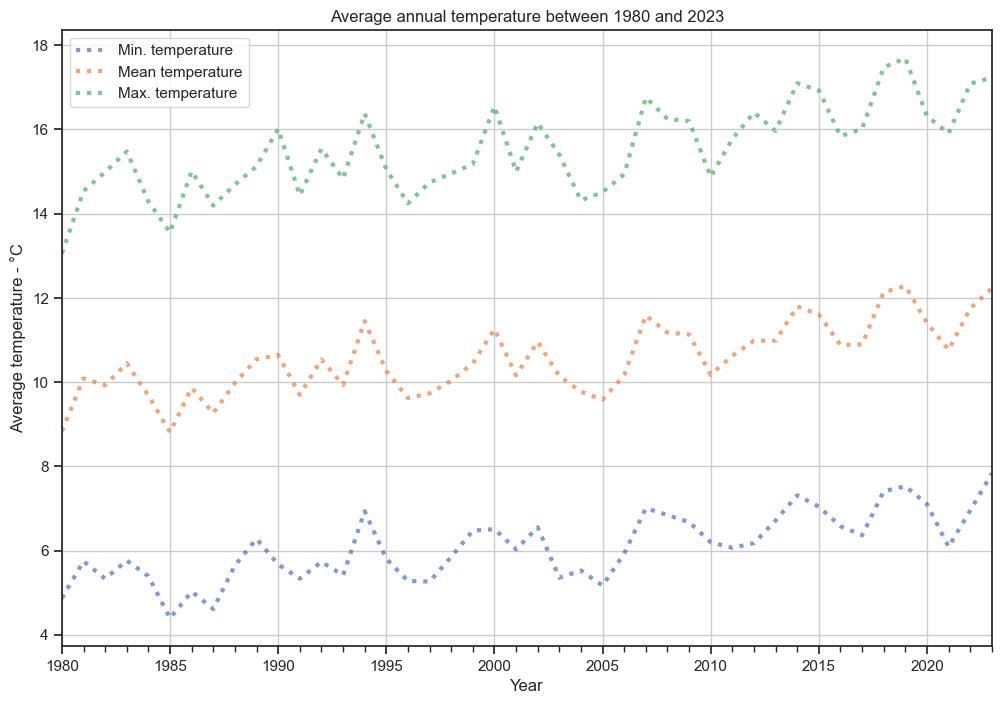

In [40]:
#plot the avg annual min., mean and max. temperature
annual_avgtemp1980.plot(kind='line', stacked=False, alpha=0.7, figsize=(12,8), linestyle= 'dotted', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Average temperature - °C')
plt.title('Average annual temperature between 1980 and 2023')
plt.legend(['Min. temperature', 'Mean temperature', 'Max. temperature'])
plt.grid(True)
plt.show()

In [24]:
annual_avgtemp1980copy = annual_avgtemp1980.copy()
annual_avgtemp1980copy.head()

,mintemp,meantemp,maxtemp
Date,,,
1980-12-31,4.867213,8.834426,13.057923
1981-12-31,5.746849,10.087945,14.537534
1982-12-31,5.331233,9.926301,14.989041
1983-12-31,5.761918,10.448767,15.476712
1984-12-31,5.391530,9.679235,14.290164


In [25]:
annual_avgtemp1980copy.reset_index(inplace=True)

In [26]:
annual_avgtemp1980copy['Date_ord'] = pd.to_datetime(annual_avgtemp1980copy['Date']).apply(lambda date: date.toordinal())

[Text(722000.0, 0, '1977'),
 Text(724000.0, 0, '1983'),
 Text(726000.0, 0, '1988'),
 Text(728000.0, 0, '1994'),
 Text(730000.0, 0, '1999'),
 Text(732000.0, 0, '2005'),
 Text(734000.0, 0, '2010'),
 Text(736000.0, 0, '2016'),
 Text(738000.0, 0, '2021'),
 Text(740000.0, 0, '2027')]

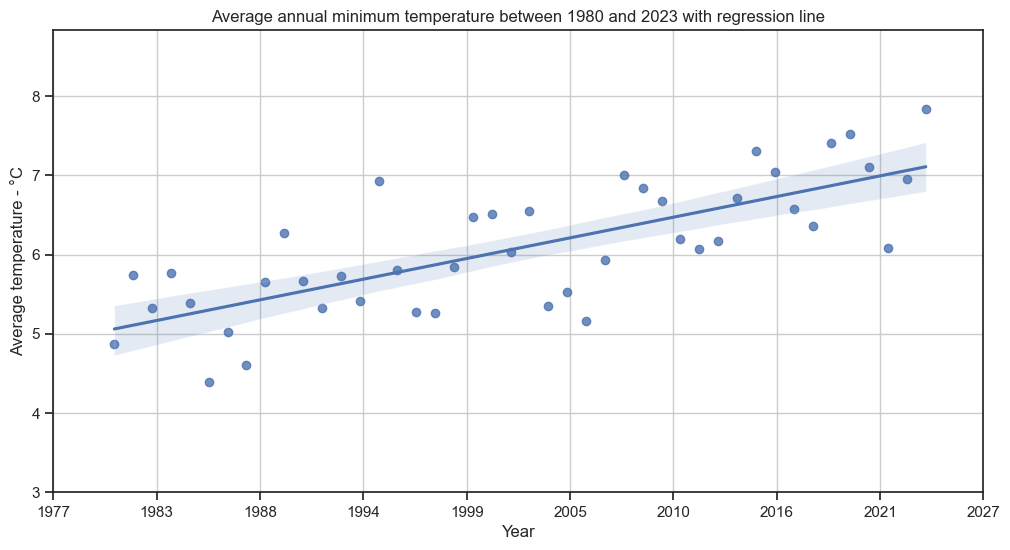

In [29]:
#plot - average annual minimum temperature
plt.figure(figsize=(12, 6))
ax = sns.regplot(
    data=annual_avgtemp1980copy,
    x='Date_ord',
    y='mintemp',
)

ax.set_xlim(annual_avgtemp1980copy['Date_ord'].min() - 1, annual_avgtemp1980copy['Date_ord'].max() + 1)
ax.set_ylim(3, annual_avgtemp1980copy['mintemp'].max() + 1)
ax.grid(True)
#Replace the ordinal X-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature - °C')
ax.set_title('Average annual minimum temperature between 1980 and 2023 with regression line')

# Get the tick locations
ticks = ax.get_xticks()

# Convert tick locations to dates
new_labels = [dt.date.fromordinal(int(item)).year for item in ticks]

# Set the new tick labels
ax.set_xticks(ticks)
ax.set_xticklabels(new_labels)


In the scatterplot above we can observe a positive trend of data which is indicated by a regression line.
The rise in the annual average minimum, mean and maximum temperature can be traced in the scatterplot below.

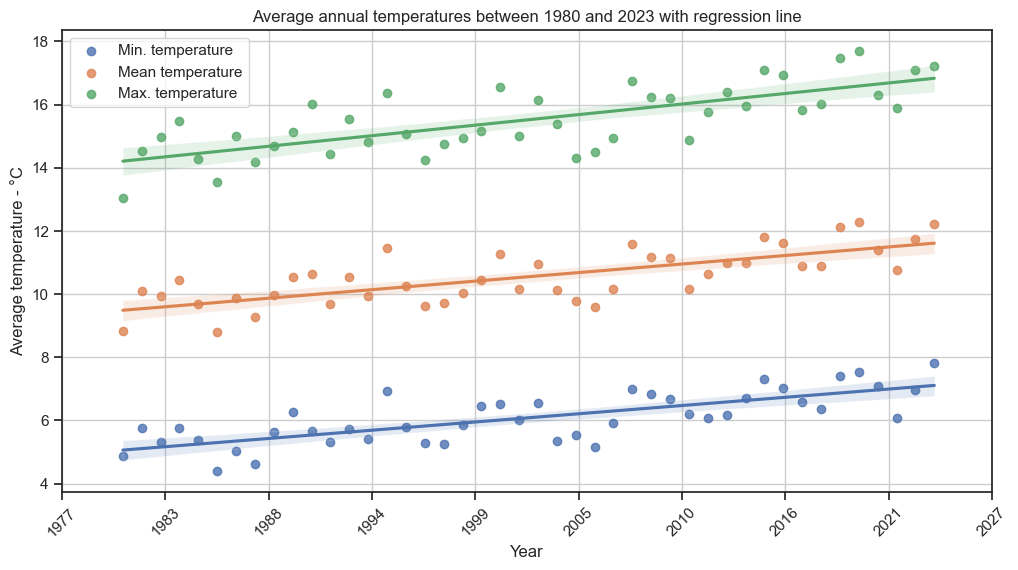

In [41]:
#plot the avg annual min., mean and max. temperature - with regression line
plt.figure(figsize=(12, 6))
sns.set(style="ticks", color_codes=True)
ax = sns.regplot(data=annual_avgtemp1980copy, x='Date_ord', y='mintemp', label='Min. temperature')
sns.regplot(data=annual_avgtemp1980copy, x='Date_ord', y='meantemp', label='Mean temperature')
sns.regplot(data=annual_avgtemp1980copy, x='Date_ord', y='maxtemp', label='Max. temperature')
ax.grid(True)

ax.set_xlabel('Year')
ax.set_ylabel('Average temperature - °C')
ax.set_title('Average annual temperatures between 1980 and 2023 with regression line')

# Get the tick locations
ticks = ax.get_xticks()

# Convert tick locations to dates
new_labels = [dt.date.fromordinal(int(item)).year for item in ticks]

# Set the new tick labels
ax.set_xticks(ticks)
ax.set_xticklabels(new_labels, rotation=45)  # Rotate labels for better readability

plt.legend()
plt.show()

In [42]:
annual_sum1980preccopy = annual_sum1980prec.copy()

In [43]:
annual_sum1980preccopy.reset_index(inplace=True)

In [45]:
annual_sum1980preccopy['Date_ord'] = pd.to_datetime(annual_sum1980preccopy['Date']).apply(lambda date: date.toordinal())

[Text(722000.0, 0, '1977'),
 Text(724000.0, 0, '1983'),
 Text(726000.0, 0, '1988'),
 Text(728000.0, 0, '1994'),
 Text(730000.0, 0, '1999'),
 Text(732000.0, 0, '2005'),
 Text(734000.0, 0, '2010'),
 Text(736000.0, 0, '2016'),
 Text(738000.0, 0, '2021'),
 Text(740000.0, 0, '2027')]

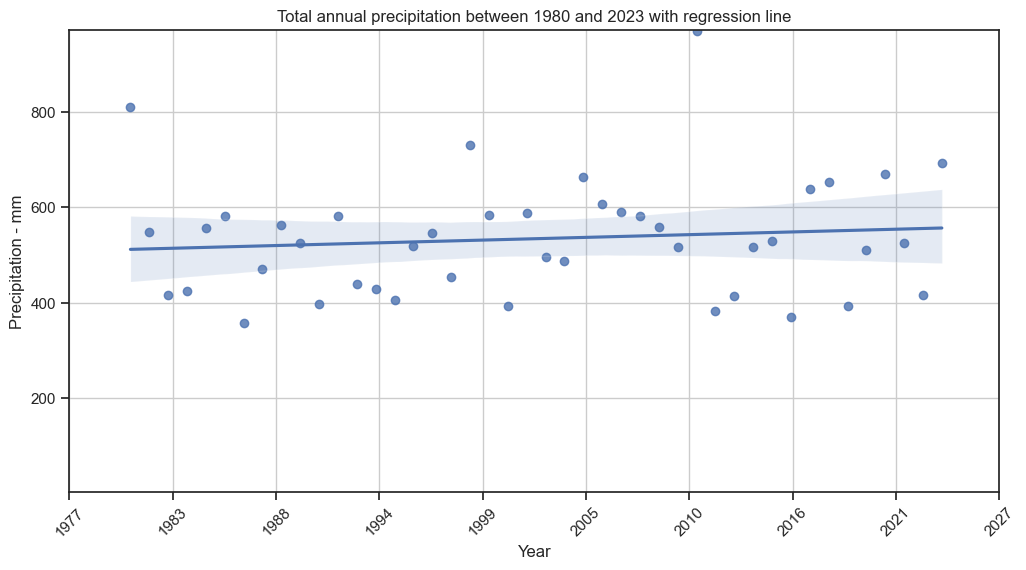

In [46]:
#Make a plot - total annual precipitation - with regression line
plt.figure(figsize=(12, 6))
ax = sns.regplot(
    data=annual_sum1980preccopy,
    x='Date_ord',
    y='precip',
)
# Tighten up the axes for prettiness
ax.set_xlim(annual_sum1980preccopy['Date_ord'].min() - 1, annual_sum1980preccopy['Date_ord'].max() + 1)
ax.set_ylim(3, annual_sum1980preccopy['precip'].max() + 1)
ax.grid(True)
#Replace the ordinal X-axis labels with nice, readable dates
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation - mm')
ax.set_title('Total annual precipitation between 1980 and 2023 with regression line')

# Get the tick locations
ticks = ax.get_xticks()

# Convert tick locations to dates
new_labels = [dt.date.fromordinal(int(item)).year for item in ticks]

# Set the new tick labels
ax.set_xticks(ticks)
ax.set_xticklabels(new_labels, rotation=45)  # Rotate labels for better readability

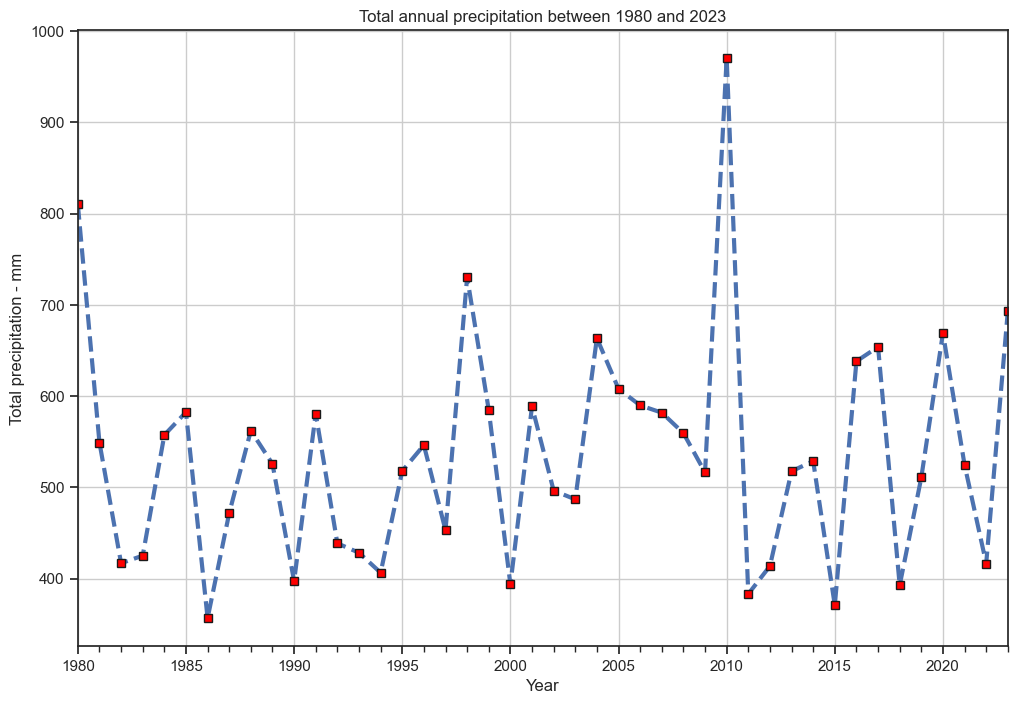

In [47]:
#plot the total annual precipitation - matplotlib
annual_sum1980prec.plot(kind='line', stacked=False, figsize=(12,8), linestyle='dashed', marker='s', linewidth=3, legend=False, mfc='red', mec='k')
plt.xlabel('Year')
plt.ylabel('Total precipitation - mm')
plt.title('Total annual precipitation between 1980 and 2023')
plt.grid(True)
plt.show()

The two diagrams above show the total annual precipitation, there is no positive or negative trend in the data.

[Text(0, 0, '1980'),
 Text(1, 0, '1981'),
 Text(2, 0, '1982'),
 Text(3, 0, '1983'),
 Text(4, 0, '1984'),
 Text(5, 0, '1985'),
 Text(6, 0, '1986'),
 Text(7, 0, '1987'),
 Text(8, 0, '1988'),
 Text(9, 0, '1989'),
 Text(10, 0, '1990'),
 Text(11, 0, '1991'),
 Text(12, 0, '1992'),
 Text(13, 0, '1993'),
 Text(14, 0, '1994'),
 Text(15, 0, '1995'),
 Text(16, 0, '1996'),
 Text(17, 0, '1997'),
 Text(18, 0, '1998'),
 Text(19, 0, '1999'),
 Text(20, 0, '2000'),
 Text(21, 0, '2001'),
 Text(22, 0, '2002'),
 Text(23, 0, '2003'),
 Text(24, 0, '2004'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '2008'),
 Text(29, 0, '2009'),
 Text(30, 0, '2010'),
 Text(31, 0, '2011'),
 Text(32, 0, '2012'),
 Text(33, 0, '2013'),
 Text(34, 0, '2014'),
 Text(35, 0, '2015'),
 Text(36, 0, '2016'),
 Text(37, 0, '2017'),
 Text(38, 0, '2018'),
 Text(39, 0, '2019'),
 Text(40, 0, '2020'),
 Text(41, 0, '2021'),
 Text(42, 0, '2022'),
 Text(43, 0, '2023')]

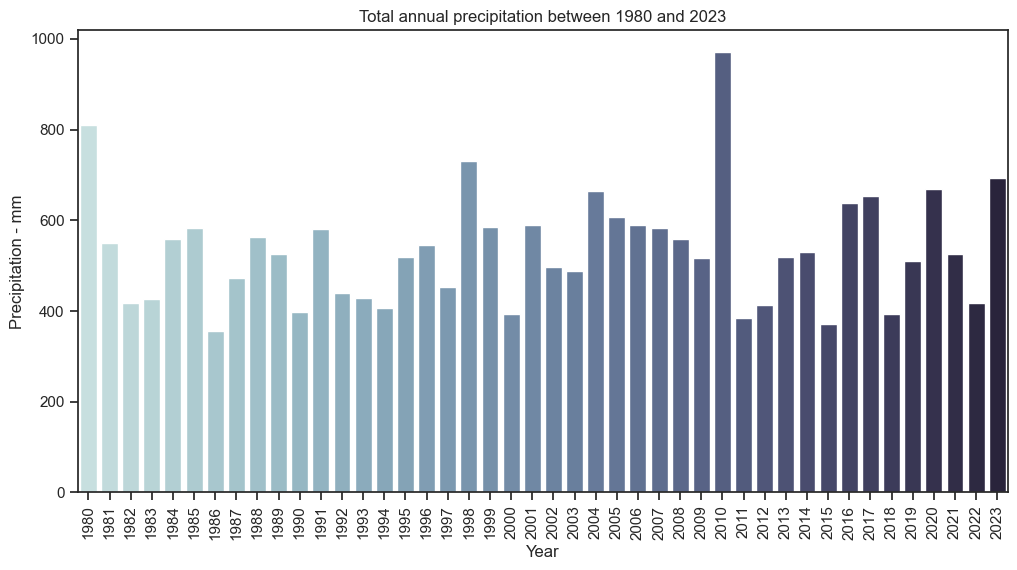

In [51]:
#plot the total annual precipitation - seaborn version
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "Date", y = 'precip', palette = "ch:start=.2,rot=-.3", hue='Date', data = annual_sum1980prec, 
                  estimator = sum, errorbar = None, ax=ax)
ax.set_title('Total annual precipitation between 1980 and 2023')
x_dates = annual_sum1980prec.index.strftime('%Y').sort_values().unique()
ax.set_xticks(range(len(x_dates)))
ax.set_ylabel('Precipitation - mm')
ax.set_xlabel('Year')
ax.set_xticklabels(labels=x_dates, rotation=90, ha='center')

Now we select the breeding period from the dataset. We examine the months from may to october from year 1980 and we make the same diagrams with the temperature and precipitation data.

In [52]:
#select the breeding period (may-october) from the dataset
df_breeding = dfnyh[dfnyh.index.month.isin([5,6,7,8,9,10])]

In [53]:
#take the average annual value of the preeding periods from 1980
df_avgbreeding = df_breeding.resample('YE').mean()
df_avgbreedingtemp = df_avgbreeding.iloc[79:,0:3]

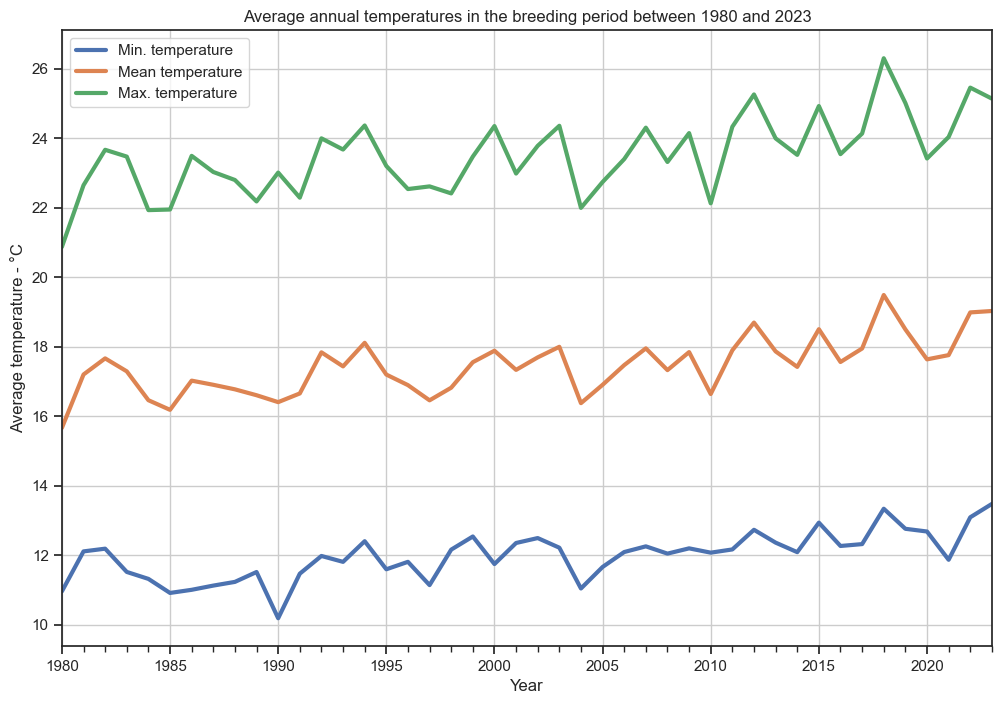

In [54]:
#plot the avg annual temperatures of breeding period
df_avgbreedingtemp.plot(kind='line', stacked=False, linewidth=3, figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Average temperature - °C')
plt.title('Average annual temperatures in the breeding period between 1980 and 2023')
plt.legend(['Min. temperature', 'Mean temperature', 'Max. temperature'])
plt.grid(True)
plt.show()

In [55]:
df_avgbreedingtempcopy = df_avgbreedingtemp.copy()
df_avgbreedingtempcopy.reset_index(inplace=True)

In [56]:
df_avgbreedingtempcopy['Date_ord'] = pd.to_datetime(df_avgbreedingtempcopy['Date']).apply(lambda date: date.toordinal())

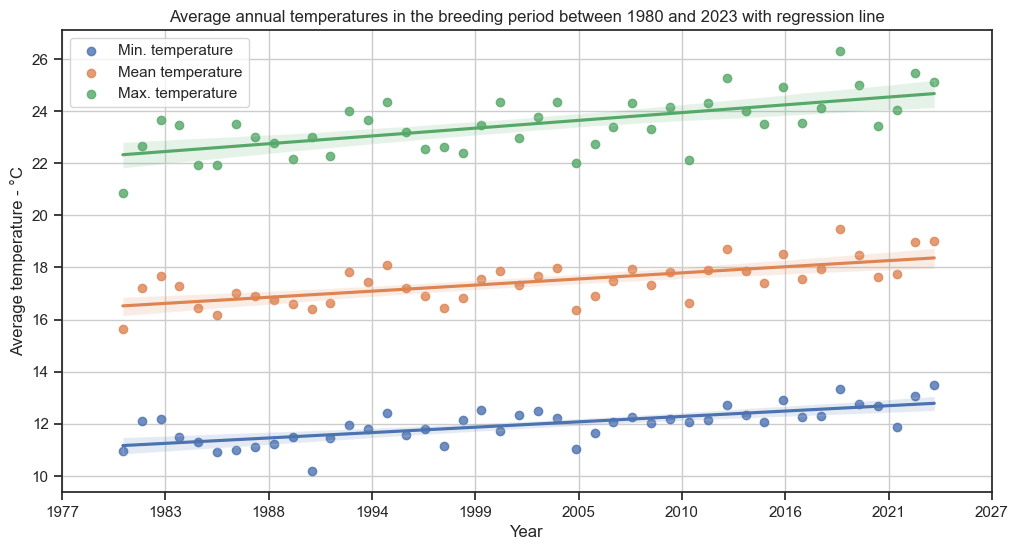

In [77]:
plt.figure(figsize=(12, 6))
sns.set(style="ticks", color_codes=True)
ax = sns.regplot(data=df_avgbreedingtempcopy, x='Date_ord', y='mintemp', label='Min. temperature')
sns.regplot(data=df_avgbreedingtempcopy, x='Date_ord', y='meantemp', label='Mean temperature')
sns.regplot(data=df_avgbreedingtempcopy, x='Date_ord', y='maxtemp', label='Max. temperature')
ax.grid(True)

ax.set_xlabel('Year')
ax.set_ylabel('Average temperature - °C')
ax.set_title('Average annual temperatures in the breeding period between 1980 and 2023 with regression line')

# Get the tick locations
ticks = ax.get_xticks()

# Convert tick locations to dates
new_labels = [dt.date.fromordinal(int(item)).year for item in ticks]

# Set the new tick labels
ax.set_xticks(ticks)
ax.set_xticklabels(new_labels)

plt.legend()
plt.show()

In [58]:
#take the total annual value in the preeding periods from 1980
df_sumbreeding = df_breeding.resample('YE').sum()
df_sumbreedingprec = df_sumbreeding.iloc[79:,3:5]
df_sumbreedingprec.columns = ['Total precipitation - mm']

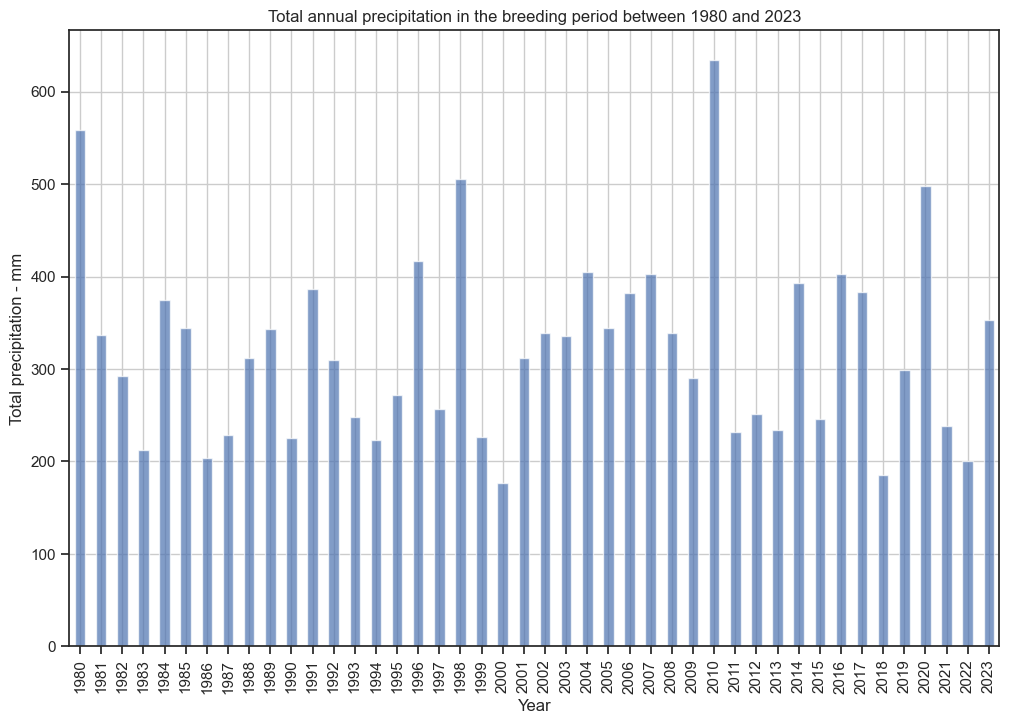

In [75]:
#plot the total precipitation of breeding period
df_sumbreedingprec.plot(kind='bar', stacked=False, alpha=0.7, figsize=(12,8), legend=False)
plt.xlabel('Year')
plt.ylabel('Total precipitation - mm')
ax = plt.gca()
years = df_sumbreedingprec.index.year
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=90)
plt.title('Total annual precipitation in the breeding period between 1980 and 2023')
plt.grid(True)
plt.show()

[Text(0, 0, '1980'),
 Text(1, 0, '1981'),
 Text(2, 0, '1982'),
 Text(3, 0, '1983'),
 Text(4, 0, '1984'),
 Text(5, 0, '1985'),
 Text(6, 0, '1986'),
 Text(7, 0, '1987'),
 Text(8, 0, '1988'),
 Text(9, 0, '1989'),
 Text(10, 0, '1990'),
 Text(11, 0, '1991'),
 Text(12, 0, '1992'),
 Text(13, 0, '1993'),
 Text(14, 0, '1994'),
 Text(15, 0, '1995'),
 Text(16, 0, '1996'),
 Text(17, 0, '1997'),
 Text(18, 0, '1998'),
 Text(19, 0, '1999'),
 Text(20, 0, '2000'),
 Text(21, 0, '2001'),
 Text(22, 0, '2002'),
 Text(23, 0, '2003'),
 Text(24, 0, '2004'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '2008'),
 Text(29, 0, '2009'),
 Text(30, 0, '2010'),
 Text(31, 0, '2011'),
 Text(32, 0, '2012'),
 Text(33, 0, '2013'),
 Text(34, 0, '2014'),
 Text(35, 0, '2015'),
 Text(36, 0, '2016'),
 Text(37, 0, '2017'),
 Text(38, 0, '2018'),
 Text(39, 0, '2019'),
 Text(40, 0, '2020'),
 Text(41, 0, '2021'),
 Text(42, 0, '2022'),
 Text(43, 0, '2023')]

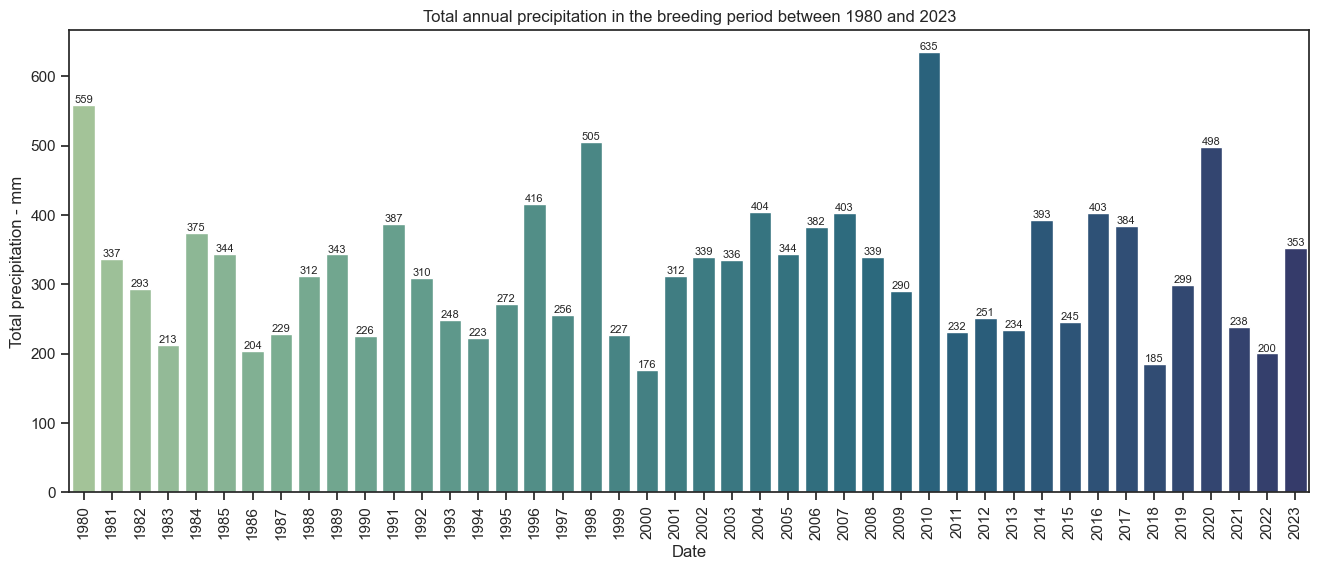

In [76]:
fig, ax = plt.subplots(figsize = (16,6))    
fig = sns.barplot(x = "Date", y = 'Total precipitation - mm', palette = "crest", hue='Date', data = df_sumbreedingprec, 
                  estimator = sum, errorbar = None, ax=ax)
#ax.bar_label(ax.containers[0:21], fontsize=10);
for container in ax.containers:
    ax.bar_label(container,size=8,fmt='%.0f')
ax.set_title('Total annual precipitation in the breeding period between 1980 and 2023')
x_dates = df_sumbreedingprec.index.strftime('%Y').sort_values().unique()
ax.set_xticks(range(len(x_dates)))
ax.set_xticklabels(labels=x_dates, rotation=90, ha='center')
#https://seaborn.pydata.org/tutorial/color_palettes.html

As in the previous annual diagrams we can see a similar relationship in the temperature data of breeding period, but the amount of precipitation data is constantly changing and there is no defining trend in the data over the years.